<a href="https://colab.research.google.com/github/BLOSSOM1994/Tree_maskRcnn/blob/master/mask_RCNN_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/BLOSSOM1994/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 967 (delta 0), reused 0 (delta 0), pack-reused 964
Receiving objects: 100% (967/967), 111.85 MiB | 38.00 MiB/s, done.
Resolving deltas: 100% (568/568), done.


In [ ]:
#RUN GPU
%tensorflow_version 1.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 1.x selected.
Found GPU at: /device:GPU:0


In [ ]:
import os
os.chdir('Mask_RCNN')

In [ ]:
!ls

assets	LICENSE      mrcnn	requirements.txt
images	MANIFEST.in  README.md	samples


In [ ]:
!python3 setup.py install;

python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Mask RCNN Prediciton - Tree

You can use this notebook to detect tree in your own images.
- Press 'shift+Enter' to run cells. 
- Run the first two cells to setup the model.
- Enter your file path in cell 3. 
- Make your predictions in cell 4.

In [ ]:
import mrcnn
import mrcnn.model as modellib
from mrcnn.config import Config
from mrcnn import visualize
from mrcnn import utils
from mrcnn.model import MaskRCNN, load_image_gt, mold_image, log

import numpy as np
import colorsys
import argparse
import random
import os
import sys
import time
import json
import skimage
import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import pickle
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

Using TensorFlow backend.


In [ ]:
modeldir='/content/drive/My Drive/Colab Notebooks'
datadir=modeldir+'/RCNN_test/'

class PredictionConfig(Config):
    NAME = "MaskRCNN_cfg"
    NUM_CLASSES = 1 + 1
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    

cfg = PredictionConfig()
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
weights_fname =modeldir+'saved/weights_tree_20200424T1244.h5'
model.load_weights(weights_fname, by_name=True)

def prediction(file, model, confidence=0.95, color='red'):
    image = skimage.io.imread(file)
    results = model.detect([image], verbose=1)[0]

    fig=plt.figure(figsize=(12,10))
    plt.plot()

    plt.imshow(image)
    plt.title('Predicted')
    ax = plt.gca()
    # Define the boxes with probabilies to keep
    keep=np.where(results['scores'] > confidence)
    keep=keep[0]
    
    for box in keep:
        y1, x1, y2, x2 = results['rois'][box]
        width, height = x2 - x1, y2 - y1
        rect = Rectangle((x1, y1), width, height, fill=False, color=color)
        ax.add_patch(rect)
        ax.text(x1, y1, 'tree', fontsize=10, color=color)
        ax.axis('off')
    plt.show()

    return results

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


## Insert the path to your file:

In [ ]:
file=datadir+'/predict/ind.jpg'

## Make a prediciton
- Change how sensitive the detection is by setting the confidence. This is the probability that the object detected is a tree (between 0.00 and 1.00)
- Change the colour of the text and bounding boxes depending on your photo

Processing 1 images
image                    shape: (168, 300, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32



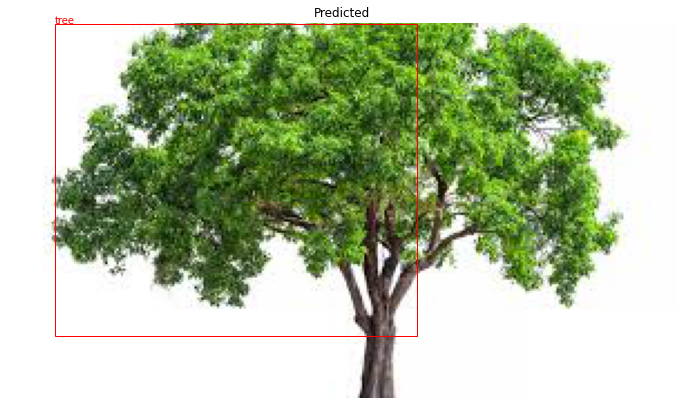

In [ ]:
r=prediction(file, model, confidence=0.95, color='red');

Processing 1 images
image                    shape: (183, 275, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


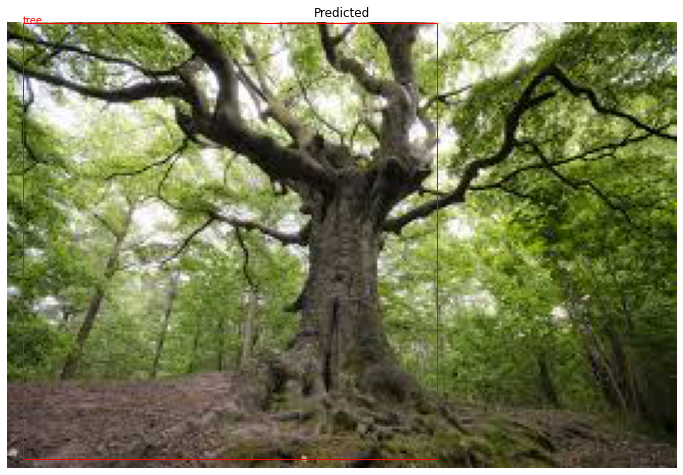

In [ ]:
file=datadir+'/predict/index.jpg'
r=prediction(file, model, confidence=0.95, color='red');

Processing 1 images
image                    shape: (183, 275, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


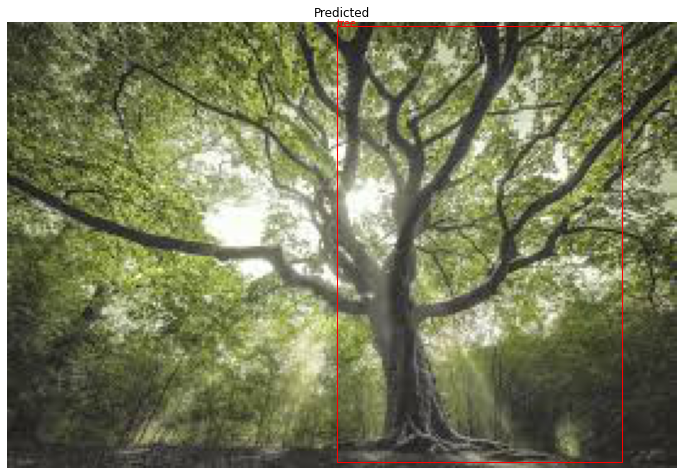

In [ ]:
file=datadir+'/predict/inde.jpg'
r=prediction(file, model, confidence=0.95, color='red');

Processing 1 images
image                    shape: (182, 277, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


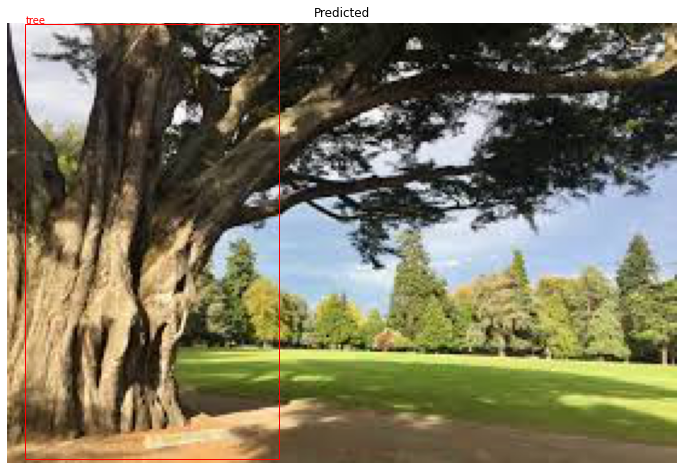

In [ ]:
file=datadir+'/predict/jj.jpg'
r=prediction(file, model, confidence=0.95, color='red');

Processing 1 images
image                    shape: (155, 325, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


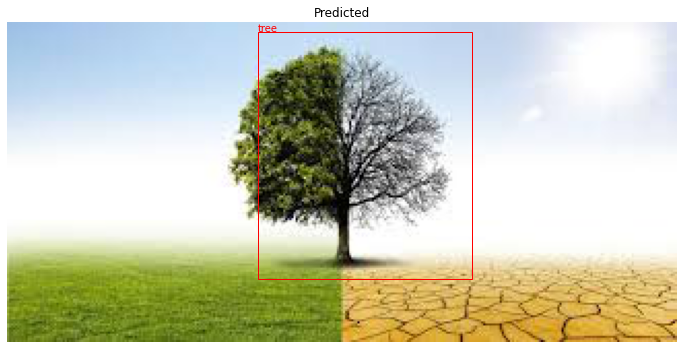

In [ ]:
file=datadir+'/predict/88.jpg'
r=prediction(file, model, confidence=0.95, color='red');

Processing 1 images
image                    shape: (180, 281, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


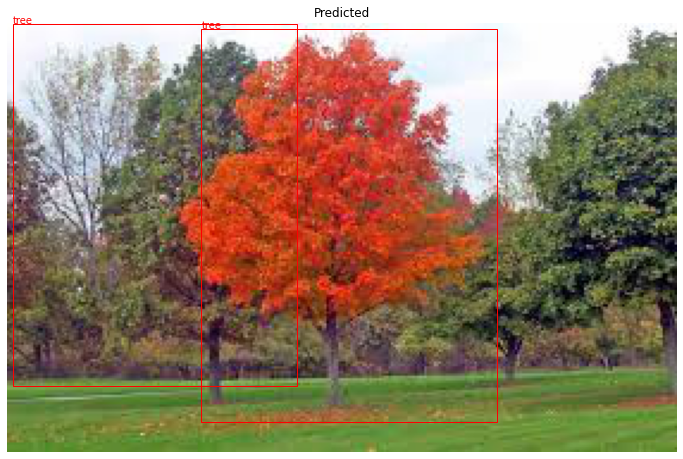

In [ ]:
file=datadir+'/predict/77.jpg'
r=prediction(file, model, confidence=0.95, color='red');

In [ ]:
class_names = ['BG', 'tree']

Processing 1 images
image                    shape: (1115, 301, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1115.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


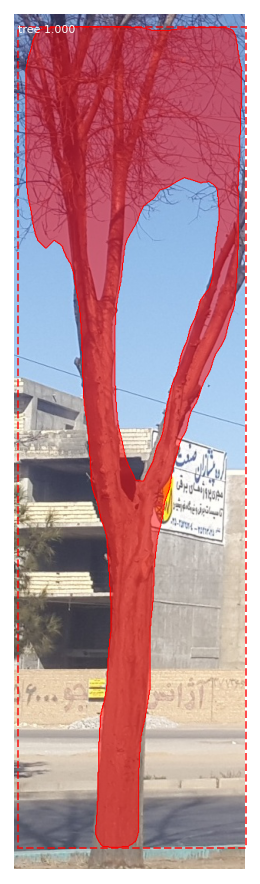

In [ ]:
# Load a random image from the images folder
IMAGE_DIR='/content/drive/My Drive/Colab Notebooks/RCNN_test/train'
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])